<span style=float:right><img src='header.jpg' alt='DestinE' align='center' width='100%'></img>

# How to discover and access data from DestinE Platform

## Prerequisites: DESP credentials

You need to have an account on the [Destination Earth Platform](https://auth.destine.eu/realms/desp/account)

<hr>

### Importing required libraries

In [13]:
import requests
import os
import json
from random import randrange
from urllib.parse import urlparse
import colorama
from colorama import Fore,Style
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import warnings
warnings.filterwarnings("ignore")

#### **Step 1:** Authentication

The HDA endpoint and the corresponding token to access the catalogue are defined as follows

In [14]:
hdaednpoint = 'https://broker.eden.destine.eu'

In [20]:
%%capture cap
%run ./auth.py

Type your username :  ········
Type your password :  ········


In [21]:
output_1 = cap.stdout.split('}\n')
token = output_1[-1][0:-1]

#### **Step 2:** Browsing the catalogue

The following code extract the full list of datasets that are available in the catalogue. The list is returned as a json object.

In [22]:
#--------------extracting the list of datasets----------------
getDatasets = requests.get(hdaednpoint + '/api/v1/datasets').json()
datasetList = getDatasets['features']

#--------------visualization of the list----------------
print(Fore.RED + '\033[1m' + 'List of available datasets:')
print('----------------------------------------------------------------------')
print ('\033[0m')

for i in getDatasets['features']:
         print(Style.BRIGHT + Fore.RED + i['metadata']['title'] + Fore.BLACK + "\033[1m" + " --> datasetId "+ "\033[0m" + "= " + i['dataset_id'])


List of available datasets:
----------------------------------------------------------------------

ERA5-Land monthly averaged data from 1950 to present --> datasetId = EO:ECMWF:DAT:REANALYSIS_ERA5_LAND_MONTHLY_MEANS
ERA5 monthly averaged data on single levels from 1940 to present --> datasetId = EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS
ERA5 hourly data on single levels from 1940 to present --> datasetId = EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS
ERA5-Land hourly data from 1950 to present --> datasetId = EO:ECMWF:DAT:REANALYSIS_ERA5_LAND
ERA5 monthly averaged data on single levels from 1940 to present in cloud-native data format --> datasetId = EO:MEEO:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS:COG
ERA5 hourly data on single levels in cloud-native data format (from 2024 to present) --> datasetId = EO:MEEO:DAT:REANALYSIS_ERA5_SINGLE_LEVELS:COG
ERA5 monthly averaged data on single levels from 1940 to present in cloud-native data format --> datasetId = EO:MEEO:DAT:R

#### **Step 3.** Querables extraction
For a given dataset, specified by its **datasetId**, the following code shows the list of available querables to be used for the data discovery operation. 

In [23]:

#--------------extracting the list of quearables----------------
datasetID = 'EO:MEEO:DAT:REANALYSIS_ERA5_SINGLE_LEVELS:COG'

getParam = requests.get(os.path.join(hdaednpoint, "api/v1/dataaccess/queryable/",datasetID), headers={"Authorization": "Bearer %s " % token}).json()


#--------------printing the list of querables----------------
print(Fore.BLUE + '\033[1m' + 'List of available querables:')
print('----------------------------------------------------------------------')
print ('\033[0m')
    
for filter,v in getParam['properties'].items():
    print(Style.BRIGHT + Fore.RED + str(filter),Fore.BLACK + str(v))
    print('')

List of available querables:
----------------------------------------------------------------------

dataset_id {'title': 'dataset_id', 'type': 'string', 'oneOf': [{'const': 'EO:MEEO:DAT:REANALYSIS_ERA5_SINGLE_LEVELS:COG', 'title': 'EO:MEEO:DAT:REANALYSIS_ERA5_SINGLE_LEVELS:COG', 'group': None}]}

itemsPerPage {'title': 'itemsPerPage', 'type': 'string', 'pattern': '^[0-9]*$'}

startIndex {'title': 'startIndex', 'type': 'string', 'pattern': '^[0-9]*$'}

subDatasetId {'title': 'title', 'type': 'string', 'oneOf': [{'const': '2m_dewpoint_temperature', 'title': '2m_dewpoint_temperature'}, {'const': '2m_temperature', 'title': '2m_temperature'}, {'const': 'total_precipitation', 'title': 'total_precipitation'}]}

endDate {'title': 'endDate', 'type': 'string', 'format': 'date-time', 'default': ''}

geometry {'title': 'title', 'type': 'array', 'minItems': 4, 'maxItems': 4, 'items': [{'type': 'number', 'maximum': -180, 'minimum': 180}, {'type': 'number', 'maximum': -90, 'minimum': 90}, {'type': '

#### **Step 4**. Basic search operation
A simple product search is implemented, providing the datasetID of the desired dataset and the maximum number of results to display. The output will be a Json object containing the metadata of the latest 10 products available in the catalogue. For each product, a selection of its metadata will be printed in the list

In [24]:

#--------------defining the parameters for the search operation----------------
maxRecords = '10'
data = {
    "dataset_id": datasetID,
    "itemsPerPage": maxRecords,
    "startIndex": "0",
    "subDatasetId":"2m_temperature"
}

##--------------running the search operation----------------
getProducts = requests.post(os.path.join(hdaednpoint, "api/v1/dataaccess/search"), headers={"Authorization": "Bearer %s " % token}, data=json.dumps(data))

results = getProducts.json()


#--------------printing the results of the search----------------
total = results['properties']['totalResults']

if total>int(maxRecords):
    print(Fore.BLACK + 'List of the ' + str(maxRecords) + ' most recent products')
else:
    print(Fore.BLACK + 'List of the ' + str(total)+ ' most recent products')
count = 1
list_result = []
for i in results["features"]:
    print("\033[1;30;1m" + '-----------------------------------------------')
    print("\033[1;30;1m" + "#" + str(count))
    print ('\033[0m')
    print(Style.BRIGHT + Fore.RED + 'product: ' + Fore.GREEN + i['id'])
    print(Style.BRIGHT + Fore.RED + 'start date: ' + Fore.GREEN + i['properties']['startdate'])
    print(Style.BRIGHT + Fore.RED + 'end date: ' + Fore.GREEN +i['properties']['enddate'])
    print(Style.BRIGHT + Fore.RED + 'location: ' + Fore.BLUE + i['properties']['location'])
    count = count+1
    result = {'product_id': i['id'], 'location':i['properties']['location']}
    list_result.append(result)

List of the 10 most recent products
-----------------------------------------------
#1

product: EO_MEEO_DAT_REANALYSIS_ERA5_SINGLE_LEVELS_COG_20240422230000_2m_temperature
start date: 2024-04-22T23:00:00Z
end date: 2024-04-22T23:00:00Z
location: /L0VPOk1FRU86REFUOlJFQU5BTFlTSVNfRVJBNV9TSU5HTEVfTEVWRUxTOkNPRy8yMDI0LzA0LzIyL0VPX01FRU9fREFUX1JFQU5BTFlTSVNfRVJBNV9TSU5HTEVfTEVWRUxTX0NPR18ybV90ZW1wZXJhdHVyZV8yMDI0MDQyMjIzMDAwMC50aWY=
-----------------------------------------------
#2

product: EO_MEEO_DAT_REANALYSIS_ERA5_SINGLE_LEVELS_COG_20240422220000_2m_temperature
start date: 2024-04-22T22:00:00Z
end date: 2024-04-22T22:00:00Z
location: /L0VPOk1FRU86REFUOlJFQU5BTFlTSVNfRVJBNV9TSU5HTEVfTEVWRUxTOkNPRy8yMDI0LzA0LzIyL0VPX01FRU9fREFUX1JFQU5BTFlTSVNfRVJBNV9TSU5HTEVfTEVWRUxTX0NPR18ybV90ZW1wZXJhdHVyZV8yMDI0MDQyMjIyMDAwMC50aWY=
-----------------------------------------------
#3

product: EO_MEEO_DAT_REANALYSIS_ERA5_SINGLE_LEVELS_COG_20240422210000_2m_temperature
start date: 2024-04-22T21:00:00Z


#### **Step 5.**  Product Download

From the short list of 10 products retrieved in the previous step, one product is directly downloaded in cache 

In [8]:
select = input('which of the displayed 10 products do you want to download? (type one number in the range 1-10) : ')
#--------------setting the parameters for the download request----------------


data = {
    "dataset_id": datasetID,
    "product_id": list_result[int(select)-1]['product_id'],
    "location": list_result[int(select)-1]['location']}

#--------------running the download request----------------
pdownload = requests.post(
    os.path.join(hdaednpoint, "api/v1/dataaccess/download"),
    headers={"Authorization": "Bearer %s " % token},
    data=json.dumps(data)
)
print(pdownload.json())

which of the displayed 10 products do you want to download? (type one number in the range 1-10) :  10


{'Location': 'http://broker.eden.destine.eu/api/v1/dataaccess/download/662f77f528c745935dfc8180', 'download_id': '662f77f528c745935dfc8180'}


#### **Step 6.** Download verification

The following lines of code verify that the product has been definitely downloaded and is available in cache.

In [9]:
while True:
    hdownload = requests.head(os.path.join(hdaednpoint, "api/v1/dataaccess/download/", pdownload.json()['download_id']),
                              headers={"Authorization": "Bearer %s " % token})
    if hdownload.status_code == 200:
        break
    else:
        print("wait I'm caching")
print('Done!')

Done!


In [10]:
#--------------downloading the product and saving it in the jupyter environment----------------
hdownload = requests.get(os.path.join(hdaednpoint, "api/v1/dataaccess/download/", pdownload.json()['download_id']),
                              headers={"Authorization": "Bearer %s " % token})

with open("response.tif", "wb") as f:
    f.write(hdownload.content)

#### **Step 7.** Data visualization

The downloaded product will be read with the **xarray** library and then plotted on a map, using  the available python packages
for data visualization

In [11]:
#--------------reading the product with xarray----------------

dataset = xr.open_dataset('./response.tif' )
dataset

<xarray.Dataset>
Dimensions:      (band: 1, x: 3600, y: 1803)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -179.8 -179.7 -179.6 -179.5 ... 179.9 180.0 180.1
  * y            (y) float64 90.08 89.98 89.88 89.78 ... -89.92 -90.03 -90.13
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

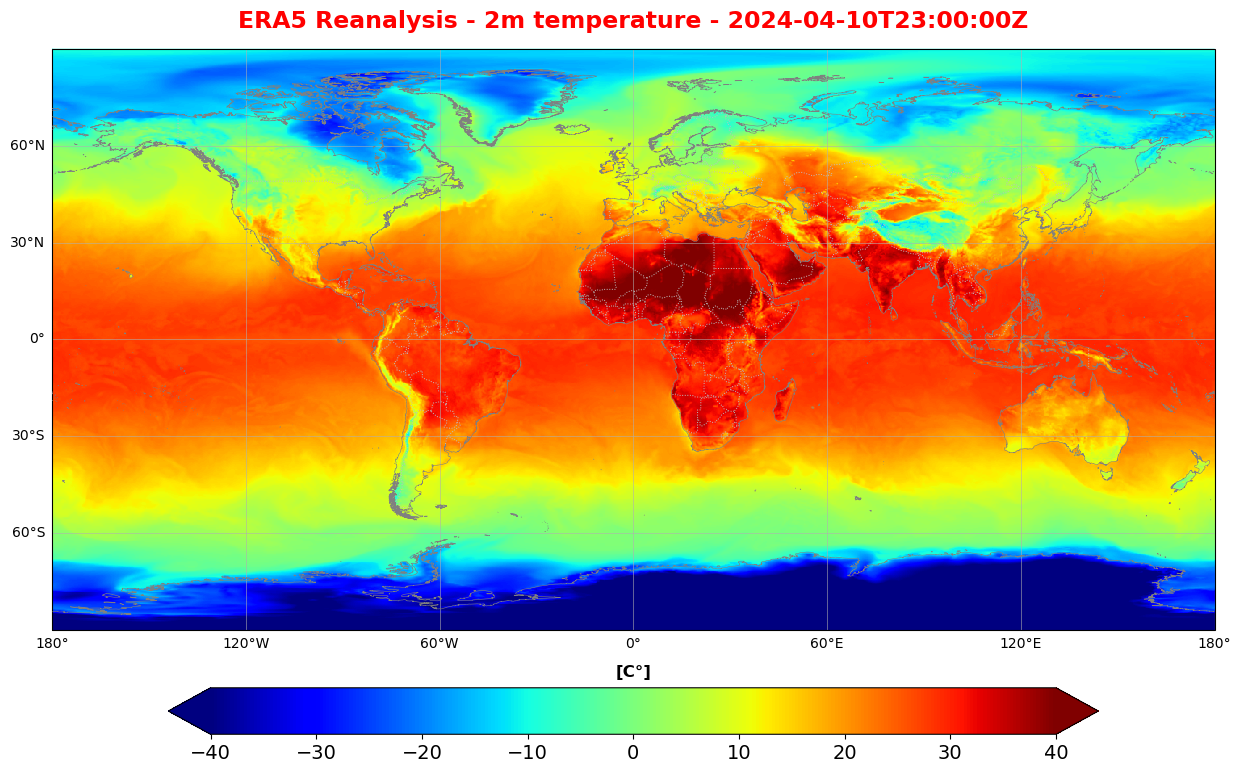

In [12]:
#--------------setting map and gridlines----------------

fig=plt.figure(figsize=(15,15))
cmap = cm.jet
cmap.set_bad('None')
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linewidth=0.4)
ax.coastlines(resolution='10m',linewidth=0.4,color = 'grey',zorder=3)
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=0.7,edgecolor = 'silver')
plt.title('ERA5 Reanalysis - 2m temperature - 2024-04-10T23:00:00Z',fontsize=17, fontweight = 'bold', pad = 15, color = 'red')
gl.xlabels_top = False
gl.ylabels_right = False

#--------------setting the colorbar----------------
img = ax.pcolormesh(dataset.x, dataset.y, dataset.band_data.values[0,:,:]-273.15, cmap = cmap,zorder = 0,vmax = 40,vmin = -40)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.08, pad=0.05,shrink = 0.8, extend = 'both')
cbar.ax.set_title('[C°]',fontsize = 12, fontweight = 'bold',pad = 8)
cbar.ax.tick_params(labelsize=14)


#--------------saving the map as an image----------------
savefig = plt.savefig('./EDEN_test.png', bbox_inches='tight')

plt.show()

<hr>

<span style=float:center><img src='footer.png' alt='DestinE' align='center' width='100%'></img>